In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import xgboost as xgb
from imblearn.combine import SMOTETomek

Preprocessing

In [ ]:
train_data = pd.read_csv("./train_data.csv", index_col=0)
valid_data = pd.read_csv("./valid_data.csv", index_col=0)


In [ ]:
train_data

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,240379.25,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.000,NaN,0
1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,50938389.00,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.260,36.0,0
2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,327790.00,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.900,NaN,0
3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,17920000.00,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,17920000.00,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,7.0,0,41.0,22.0,25.0,37.0,NaN,11162.00,NaN,115880.00,...,19.0,0.0,0.0,NaN,NaN,0.0,11.920868,NaN,NaN,0
55708,12.0,0,55.0,9.0,28.0,44.0,NaN,41118.00,NaN,35000.00,...,17.0,0.0,0.0,NaN,NaN,4882.0,11.276203,NaN,0.0,1
55709,9.0,0,95.0,33.0,32.0,NaN,NaN,NaN,NaN,924590.00,...,62.0,0.0,0.0,NaN,15.0,15896.0,12.390766,12478.000,8.0,1
55710,17.0,0,114.0,6.0,39.0,NaN,NaN,NaN,200000.0,385461.00,...,0.0,1.0,0.0,0.000000,23.0,60390.0,12.740195,922.315,NaN,0


In [ ]:
valid_data

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,2.0,0,65.0,NaN,31.0,NaN,NaN,NaN,NaN,20775423.00,...,4.0,1.0,0.0,NaN,300.0,0.0,13.042679,68733.475000,10.0,0
1,0.0,0,54.0,NaN,26.0,NaN,0.541082,NaN,767458.000000,1914840.00,...,21.0,0.0,0.0,0.541082,2.0,0.0,NaN,21704.000000,9.0,0
2,14.0,0,85.0,NaN,53.0,2.0,0.626846,18596.55,980126.500000,3580186.00,...,11.0,2.0,2.0,0.997200,140.0,0.0,NaN,18699.547647,27.0,1
3,4.0,0,7.0,NaN,42.0,NaN,NaN,64984.52,NaN,797969.00,...,NaN,0.0,1.0,NaN,6.0,NaN,14.086852,66497.420000,NaN,0
4,2.0,0,136.0,NaN,35.0,NaN,0.392477,NaN,539909.000000,23919158.00,...,35.0,0.0,0.0,0.392477,56.0,0.0,13.065869,63887.623333,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13515,12.0,1,15.0,NaN,20.0,NaN,0.666010,18082.34,79995.000000,4998000.00,...,2.0,3.0,1.0,0.848000,40.0,0.0,NaN,43355.064286,3.0,0
13516,7.0,0,66.0,NaN,53.0,NaN,NaN,3003.80,500000.000000,15837787.78,...,32.0,1.0,4.0,0.000000,72.0,0.0,14.220249,97325.000000,33.0,0
13517,33.0,0,133.0,32.0,44.0,NaN,0.950513,72286.72,764291.428571,2032302.00,...,0.0,6.0,4.0,1.000000,70.0,6.0,NaN,37125.244545,NaN,0
13518,11.0,0,34.0,NaN,24.0,NaN,0.789136,191250.00,333333.333333,4561900.00,...,4.0,7.0,7.0,0.985320,62.0,0.0,NaN,64331.208333,8.0,0


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55712 entries, 0 to 55711
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   days_90_queries                           54275 non-null  float64
 1   flag_zpexp                                55712 non-null  int64  
 2   ageolddate_f7                             55259 non-null  float64
 3   f41_my                                    23777 non-null  float64
 4   age2                                      55712 non-null  float64
 5   f39_my                                    19307 non-null  float64
 6   active_crd_amount_to_limit                36437 non-null  float64
 7   sumlastvalue_7_f50                        33036 non-null  float64
 8   avg_active_credit_limit                   38207 non-null  float64
 9   total_amount                              52251 non-null  float64
 10  amount_of_last_term_contr              

In [ ]:
train_data.describe()


,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
count,54275.000000,55712.000000,55259.000000,23777.000000,55712.000000,19307.000000,36437.000000,3.303600e+04,3.820700e+04,5.225100e+04,...,51112.000000,55260.000000,55254.000000,38207.000000,43463.000000,54310.000000,16911.000000,5.128700e+04,43092.000000,55712.000000
mean,12.090392,0.135824,75.889520,18.675064,34.386326,26.837054,0.721308,4.908516e+04,7.590147e+05,6.492674e+06,...,15.077125,2.835993,1.123919,0.778214,78.835768,4914.701897,12.961345,4.163461e+04,20.004897,0.187195
std,12.974924,0.342604,110.292805,15.371279,9.609283,18.222779,0.220594,1.671543e+05,9.094260e+05,1.597336e+07,...,26.510788,4.094233,2.214252,0.272560,85.511028,12527.493882,0.838236,5.798415e+04,19.505226,0.390071
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000006,0.000000e+00,1.000000e+00,1.846520e+03,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166784,0.000000e+00,0.000000,0.000000
25%,3.000000,0.000000,46.000000,7.000000,27.000000,13.000000,0.597431,9.904000e+03,2.000000e+05,9.851385e+05,...,1.000000,0.000000,0.000000,0.667182,23.000000,0.000000,12.430451,1.745494e+04,8.000000,0.000000
50%,8.000000,0.000000,71.000000,14.000000,33.000000,23.000000,0.767137,2.544739e+04,5.250000e+05,2.653513e+06,...,5.000000,2.000000,0.000000,0.879608,53.000000,1.000000,13.033576,3.237733e+04,14.000000,0.000000
75%,17.000000,0.000000,102.000000,27.000000,40.000000,39.000000,0.896207,5.631332e+04,9.667733e+05,7.073712e+06,...,16.000000,4.000000,1.000000,0.984520,104.000000,382.000000,13.519280,5.410904e+04,26.000000,0.000000
max,138.000000,1.000000,24158.000000,154.000000,89.000000,145.000000,1.969946,2.045004e+07,2.122999e+07,1.785822e+09,...,667.000000,89.000000,42.000000,8.059675,1589.000000,119128.000000,19.641366,4.953765e+06,244.000000,1.000000


In [ ]:
#checking outliers
z_scores = np.abs(stats.zscore(train_data.select_dtypes(include=[np.number])))
outliers = (z_scores > .5).sum(axis=0)
outliers

,0
days_90_queries,0
flag_zpexp,7567
ageolddate_f7,0
f41_my,0
age2,33905
f39_my,0
active_crd_amount_to_limit,0
sumlastvalue_7_f50,0
avg_active_credit_limit,0
total_amount,0


In [ ]:
#looking for percentage of missing data
percent = train_data.isnull().sum() * 100 / len(train_data)
percent.sort_values(ascending=False)

,0
final_resincome,69.645678
f39_my,65.344989
f41_my,57.321582
f38_my,50.807725
sumlastvalue_7_f50,40.702183
active_crd_amount_to_limit,34.597573
avg_active_credit_limit,31.420520
max_active_crd_res_amount_to_limit,31.420520
sm_plus_3_months_rt,24.782812
max_del_history,24.280227


In [ ]:
# Filling missing values
train_data['final_resincome'].fillna(train_data['final_resincome'].median(), inplace=True)
#Highly likely that in this columns data missing due to there was no overdue payment by client
train_data['f38_my'].fillna(0, inplace=True)
train_data['f39_my'].fillna(0, inplace=True)
train_data['f41_my'].fillna(0, inplace=True)
train_data['sumlastvalue_7_f50'].fillna(0, inplace=True)
#Highly likely that this columns does have most of missing values due to client does not have active card and etc
train_data['active_crd_amount_to_limit'].fillna(0, inplace=True)
train_data['avg_active_credit_limit'].fillna(0, inplace=True)
train_data['max_active_crd_res_amount_to_limit'].fillna(0, inplace=True)
train_data['sm_plus_3_months_rt'].fillna(0, inplace=True)
train_data['agelifelastterm_f29'].fillna(train_data['agelifelastterm_f29'].median(), inplace=True)
train_data['total_credit_limit'].fillna(0, inplace=True)
train_data['total_amount'].fillna(0, inplace=True)
train_data['f8'].fillna(train_data['f8'].median(), inplace=True)
train_data['max_del_history'].fillna(0, inplace=True)
train_data['inst_credit_cnt'].fillna(0, inplace=True)
train_data['inst_crd_cnt'].fillna(0, inplace=True)
train_data['amount_of_last_term_contr'].fillna(0, inplace=True)
#Possibly that nan values due to not having card so better to fill missing values with median value
train_data['avg_active_amount'].fillna(train_data['avg_active_amount'].median(), inplace=True)
#Possibly nan values due to absence of activity before and to differentiante with zeros(whcich indicate that client closed all loans) put -1
train_data['active_number_of_outstanding_instalments'].fillna(-1.0, inplace=True)
#Similar here
train_data['ageoldexsdate_f5'].fillna(train_data['ageoldexsdate_f5'].median(), inplace=True)
# Number of requests for 90 days
train_data['avgcontractlife'].fillna(train_data['avgcontractlife'].median(), inplace=True)
train_data['days_90_queries'].fillna(train_data['days_90_queries'].median(), inplace=True)
train_data['value_cr_card_contract'].fillna(train_data['value_cr_card_contract'].median(), inplace=True)
train_data['max_overdue_cr_card'].fillna(train_data['max_overdue_cr_card'].median(), inplace=True)
train_data['overdue_credit_contract'].fillna(train_data['overdue_credit_contract'].median(), inplace=True)
train_data['cnt_overdue_0_f151'].fillna(train_data['cnt_overdue_0_f151'].median(), inplace=True)
train_data['closedel_6'].fillna(train_data['closedel_6'].median(), inplace=True)
train_data['closedel_12_f95'].fillna(train_data['closedel_12_f95'].median(), inplace=True)

train_data['gender'].fillna(train_data['gender'].mode()[0], inplace=True)

train_data['ageolddate_f7'].fillna(train_data['ageolddate_f7'].median(), inplace=True)
train_data['credit_closed_cnt'].fillna(train_data['credit_closed_cnt'].median(), inplace=True)
train_data['cntstartcntr_3_f75'].fillna(train_data['cntstartcntr_3_f75'].median(), inplace=True)
train_data['total_crd_cnt'].fillna(train_data['total_crd_cnt'].median(), inplace=True)
train_data['f156'].fillna(train_data['f156'].median(), inplace=True)



<ipython-input-33-0fba2245af42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['final_resincome'].fillna(train_data['final_resincome'].median(), inplace=True)
<ipython-input-33-0fba2245af42>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
# Filling missing values
valid_data['final_resincome'].fillna(valid_data['final_resincome'].median(), inplace=True)
#Highly likely that in this columns data missing due to there was no overdue payment by client
valid_data['f38_my'].fillna(0, inplace=True)
valid_data['f39_my'].fillna(0, inplace=True)
valid_data['f41_my'].fillna(0, inplace=True)
valid_data['sumlastvalue_7_f50'].fillna(0, inplace=True)
#Highly likely that this columns does have most of missing values due to client does not have active card and etc
valid_data['active_crd_amount_to_limit'].fillna(0, inplace=True)
valid_data['avg_active_credit_limit'].fillna(0, inplace=True)
valid_data['max_active_crd_res_amount_to_limit'].fillna(0, inplace=True)
valid_data['sm_plus_3_months_rt'].fillna(0, inplace=True)
valid_data['agelifelastterm_f29'].fillna(valid_data['agelifelastterm_f29'].median(), inplace=True)
valid_data['total_credit_limit'].fillna(0, inplace=True)
valid_data['total_amount'].fillna(0, inplace=True)
valid_data['f8'].fillna(valid_data['f8'].median(), inplace=True)
valid_data['max_del_history'].fillna(0, inplace=True)
valid_data['inst_credit_cnt'].fillna(0, inplace=True)
valid_data['inst_crd_cnt'].fillna(0, inplace=True)
valid_data['amount_of_last_term_contr'].fillna(0, inplace=True)
#Possibly that nan values due to not having card so better to fill missing values with median value
valid_data['avg_active_amount'].fillna(valid_data['avg_active_amount'].median(), inplace=True)
#Possibly nan values due to absence of activity before and to differentiante with zeros(whcich indicate that client closed all loans) put -1
valid_data['active_number_of_outstanding_instalments'].fillna(-1.0, inplace=True)
#Similar here
valid_data['ageoldexsdate_f5'].fillna(valid_data['ageoldexsdate_f5'].median(), inplace=True)
# Number of requests for 90 days
valid_data['avgcontractlife'].fillna(valid_data['avgcontractlife'].median(), inplace=True)
valid_data['days_90_queries'].fillna(valid_data['days_90_queries'].median(), inplace=True)
valid_data['value_cr_card_contract'].fillna(valid_data['value_cr_card_contract'].median(), inplace=True)
valid_data['max_overdue_cr_card'].fillna(valid_data['max_overdue_cr_card'].median(), inplace=True)
valid_data['overdue_credit_contract'].fillna(valid_data['overdue_credit_contract'].median(), inplace=True)
valid_data['cnt_overdue_0_f151'].fillna(valid_data['cnt_overdue_0_f151'].median(), inplace=True)
valid_data['closedel_6'].fillna(valid_data['closedel_6'].median(), inplace=True)
valid_data['closedel_12_f95'].fillna(valid_data['closedel_12_f95'].median(), inplace=True)

valid_data['gender'].fillna(valid_data['gender'].mode()[0], inplace=True)

valid_data['ageolddate_f7'].fillna(valid_data['ageolddate_f7'].median(), inplace=True)
valid_data['credit_closed_cnt'].fillna(valid_data['credit_closed_cnt'].median(), inplace=True)
valid_data['cntstartcntr_3_f75'].fillna(valid_data['cntstartcntr_3_f75'].median(), inplace=True)
valid_data['total_crd_cnt'].fillna(valid_data['total_crd_cnt'].median(), inplace=True)
valid_data['f156'].fillna(valid_data['f156'].median(), inplace=True)


<ipython-input-34-ddb0c36ca216>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_data['final_resincome'].fillna(valid_data['final_resincome'].median(), inplace=True)
<ipython-input-34-ddb0c36ca216>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
convert_to_int = [
    'days_90_queries', 'flag_zpexp', 'f41_my', 'f39_my', 'total_crd_cnt', 'gender',
    'inst_crd_cnt', 'credit_closed_cnt', 'cnt_overdue_0_f151', 'f38_my', 'f156',
    'closedel_6', 'closedel_12_f95', 'cntstartcntr_3_f75', 'active_number_of_outstanding_instalments', 'age2'
]

train_data[convert_to_int] = train_data[convert_to_int].astype(int)
valid_data[convert_to_int] = valid_data[convert_to_int].astype(int)

In [ ]:
#age to category
bins = [17, 24, 34, 44, 54, 64, 110]
labels = [0, 1, 2, 3, 4, 5]
train_data['age2'] = pd.cut(train_data['age2'], bins=bins, labels=labels).astype(int)


In [ ]:
#scaling for better perfomance
scale_columns = [
    'days_90_queries', 'ageolddate_f7', 'f41_my', 'f39_my',
    'active_crd_amount_to_limit', 'sumlastvalue_7_f50', 'avg_active_credit_limit',
    'total_amount', 'amount_of_last_term_contr', 'avgcontractlife',
    'sm_plus_3_months_rt', 'ageoldexsdate_f5', 'total_crd_cnt',
    'inst_crd_cnt', 'avg_active_amount', 'max_overdue_cr_card',
    'overdue_credit_contract', 'total_credit_limit', 'max_del_history',
    'cnt_overdue_0_f151', 'credit_closed_cnt', 'f38_my', 'f156',
    'closedel_6', 'agelifelastterm_f29', 'cntstartcntr_3_f75',
    'closedel_12_f95', 'max_active_crd_res_amount_to_limit',
    'active_number_of_outstanding_instalments', 'value_cr_card_contract',
    'final_resincome', 'f8', 'inst_credit_cnt'
]

scaler = StandardScaler()
train_data[scale_columns] = scaler.fit_transform(train_data[scale_columns])
valid_data[scale_columns] = scaler.transform(valid_data[scale_columns])


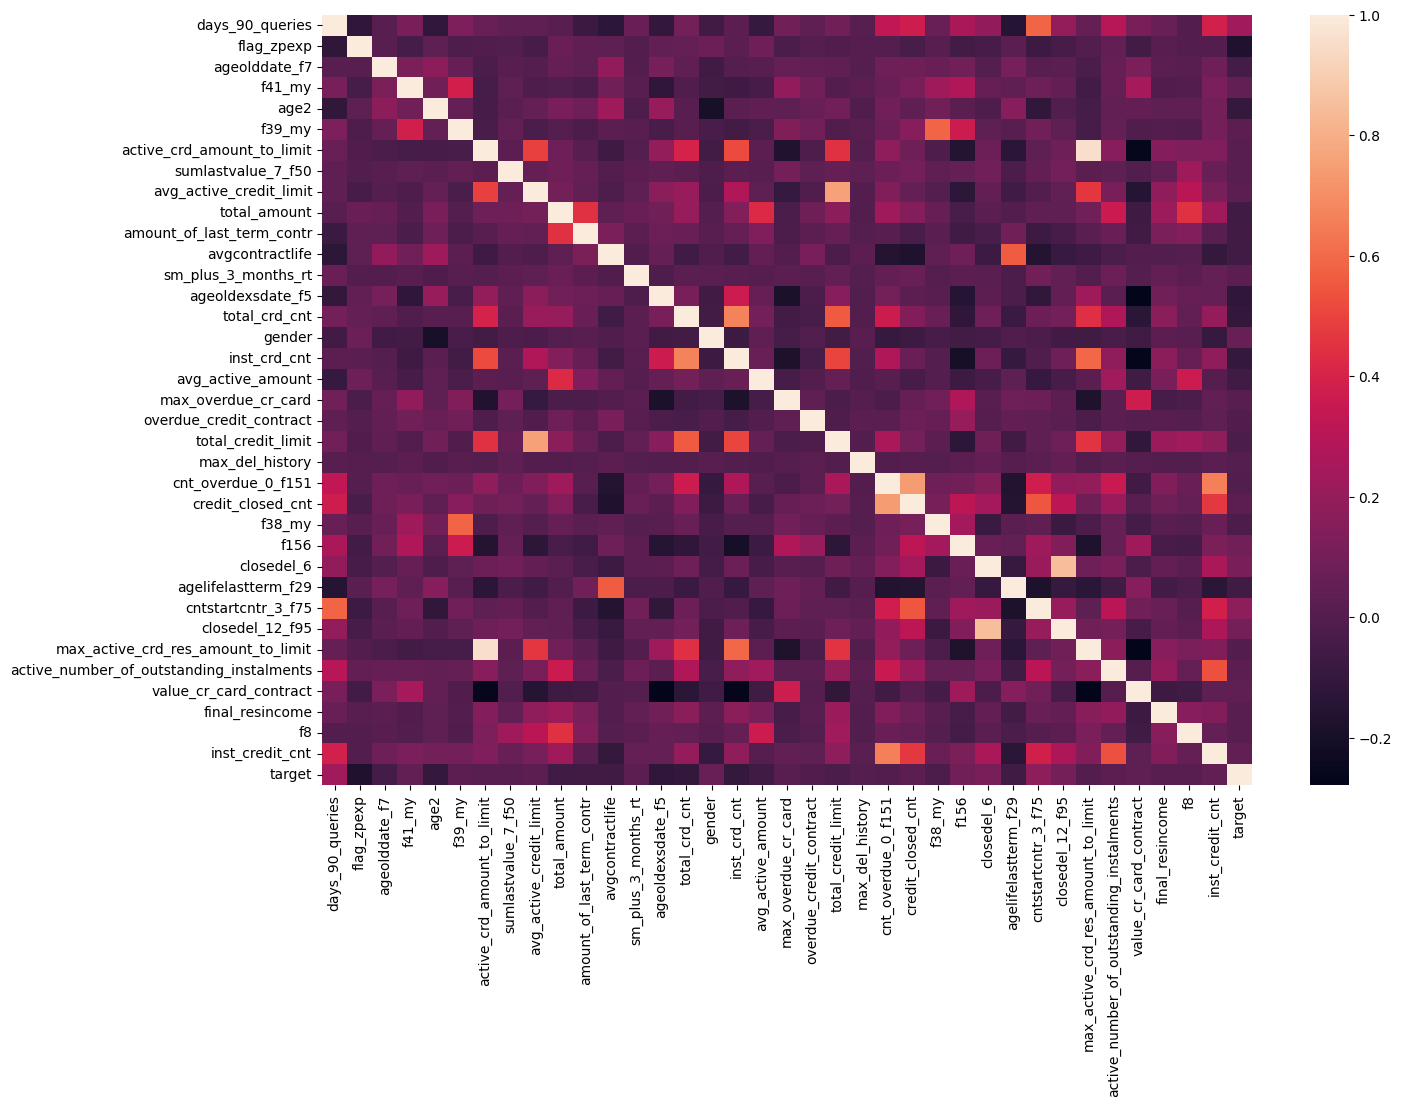

In [ ]:
#Lets look at correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix)
plt.show()

In [ ]:
#PCA
categorical_columns = ['gender', 'flag_zpexp', 'age2', 'target']

pca = PCA(n_components=20)
pca.fit(train_data[scale_columns])
train_pca_columns = pca.transform(train_data[scale_columns])
train_pca_df = pd.DataFrame(train_pca_columns, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])
train_pca = pd.concat([train_data[categorical_columns].reset_index(drop=True), train_pca_df.reset_index(drop=True)], axis=1)
valid_pca_columns = pca.transform(valid_data[scale_columns])
valid_pca_df = pd.DataFrame(valid_pca_columns, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])
valid_pca = pd.concat([valid_data[categorical_columns].reset_index(drop=True), valid_pca_df.reset_index(drop=True)], axis=1)

In [ ]:
#inbalanced dataset, so we used SMOTE

X_train = train_pca.drop(columns=['target'])
y_train = train_pca['target']
X_val = valid_pca.drop(columns=['target'])
y_val = valid_pca['target']

smotet = SMOTETomek(random_state=42)
X_train, y_train = smotet.fit_resample(X_train, y_train)



Training


In [ ]:
#check different models
models = {
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=9),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=9),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_split=10),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    auc_roc = roc_auc_score(y_val, y_pred_proba)

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(classification_report(y_val, y_pred))
    y_pred_proba = model.predict_proba(X_val)[:, 1]


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Balanced Random Forest - Cross-Validation Accuracy: 0.8912 ± 0.0036


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy: 0.8680
AUC-ROC: 0.8263
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12169
           1       0.36      0.39      0.37      1351

    accuracy                           0.87     13520
   macro avg       0.64      0.66      0.65     13520
weighted avg       0.87      0.87      0.87     13520

XGBoost - Cross-Validation Accuracy: 0.8128 ± 0.0086
Validation Accuracy: 0.8376
AUC-ROC: 0.7647
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12169
           1       0.26      0.33      0.29      1351

    accuracy                           0.84     13520
   macro avg       0.59      0.61      0.60     13520
weighted avg       0.86      0.84      0.85     13520

Gradient Boosting - Cross-Validation Accuracy: 0.7326 ± 0.0052
Validation Accuracy: 0.7299
AUC-ROC: 0.7976
              precision    recall  f1-score   support

           0       0.96      0.73      0.83

In [ ]:

#As balanced random forest showed best result, we will find the best hyperparameters
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from scipy.stats import randint, uniform

brf_model = BalancedRandomForestClassifier(random_state=9)


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

#Scorer is tied to minority f1 score
scorer = make_scorer(f1_score, pos_label=1)
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist,
                                   n_iter=5, scoring=scorer, cv=5, verbose=2, n_jobs=-1, random_state=9)


random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best F1 score: ", random_search.best_score_)


best_brf_model = random_search.best_estimator_
y_pred_valid = best_brf_model.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_valid))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 284}
Best F1 score:  0.8340696898785378
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     12169
           1       0.26      0.62      0.37      1351

    accuracy                           0.79     13520
   macro avg       0.61      0.71      0.62     13520
weighted avg       0.88      0.79      0.82     13520



In [ ]:

brf_model = BalancedRandomForestClassifier(
    bootstrap=True,
    class_weight='balanced',
    max_depth=13,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=284,
    random_state=42  # For reproducibility
)

brf_model.fit(X_train, y_train)
y_pred = brf_model.predict(X_val)
y_pred_proba = brf_model.predict_proba(X_val)[:, 1]

print("Classification Report:\n", classification_report(y_val, y_pred))
print("AUC-ROC: ", roc_auc_score(y_val, y_pred_proba))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87     12169
           1       0.26      0.62      0.37      1351

    accuracy                           0.78     13520
   macro avg       0.60      0.71      0.62     13520
weighted avg       0.88      0.78      0.82     13520

AUC-ROC:  0.8135123472969107


In [ ]:
y_pred_prob = best_brf_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

optimal_threshold = thresholds[f1_scores.argmax()]
print("Optimal Threshold: ", optimal_threshold)

y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

print(classification_report(y_val, y_pred_optimal))


Optimal Threshold:  0.5424606747454183
              precision    recall  f1-score   support

           0       0.94      0.85      0.90     12169
           1       0.29      0.55      0.38      1351

    accuracy                           0.82     13520
   macro avg       0.62      0.70      0.64     13520
weighted avg       0.88      0.82      0.84     13520

